# jammer
## 13- Turning off the Chebyshev polynomials
### Part I. Starfish outcome

(We also happen to have used the wavelength-dependent spectral resolution for the first time...)


In [7]:
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [2]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"sigAmp", r"logAmp", r"$l$"] 

In [3]:
ws = np.load("../sf/Gl570D_resg/output/marley_grid/run02/temp_emcee_chain.npy")

In [4]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [5]:
burned.shape

(40, 1000, 8)

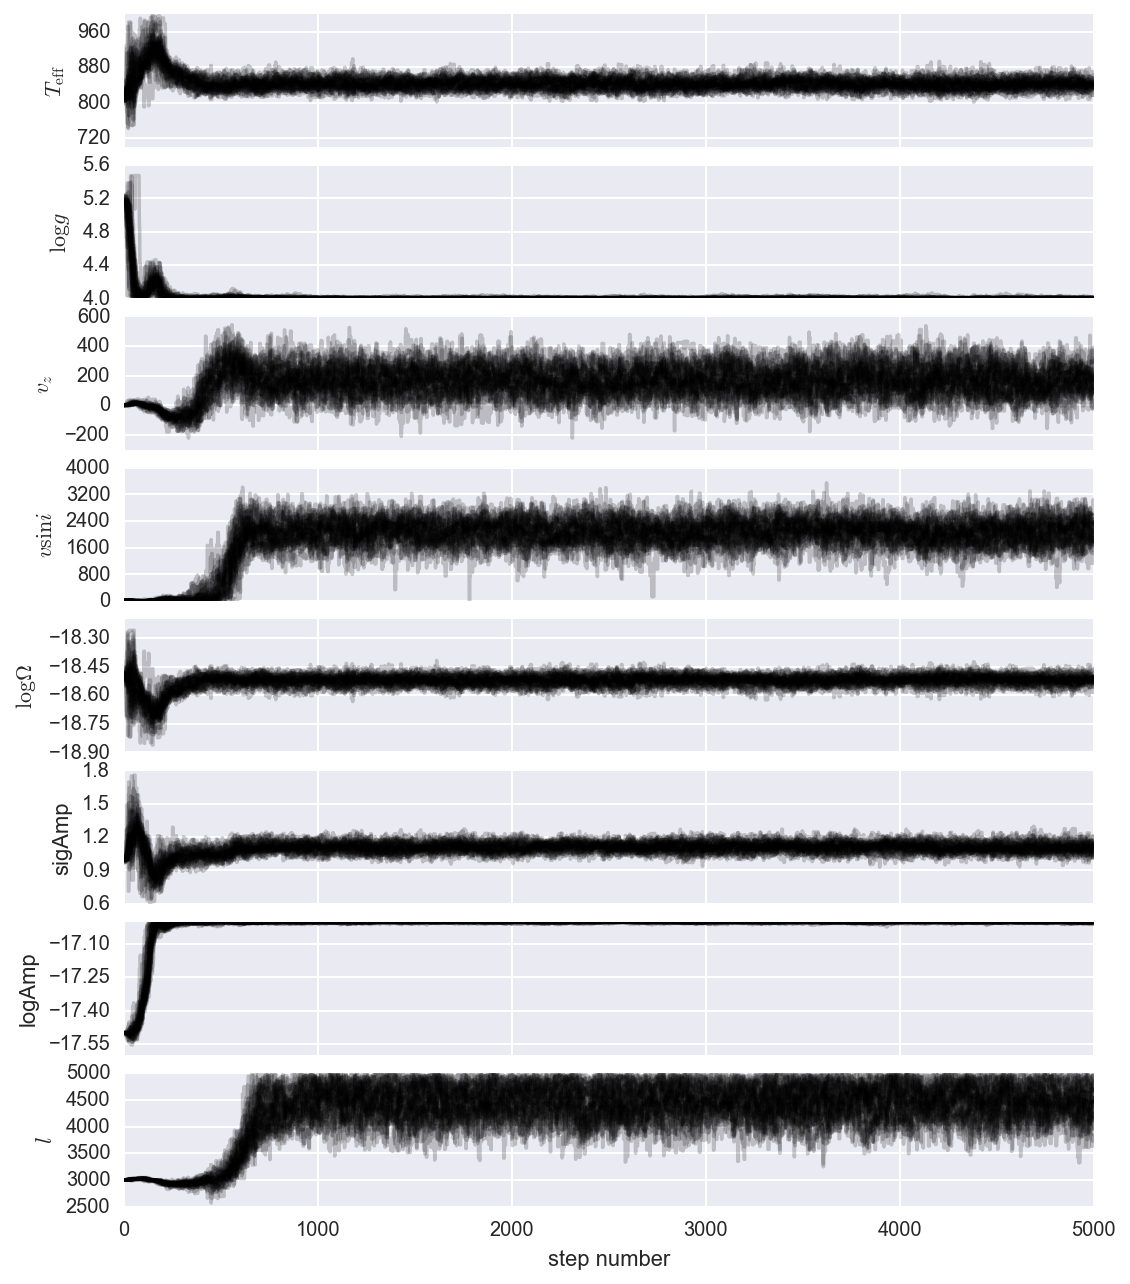

In [6]:
fig, axes = plt.subplots(8, 1, sharex=True, figsize=(8, 9))
for i in range(0, 8, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[7].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

Hmm, why is $\log{g}$ being driven so low?

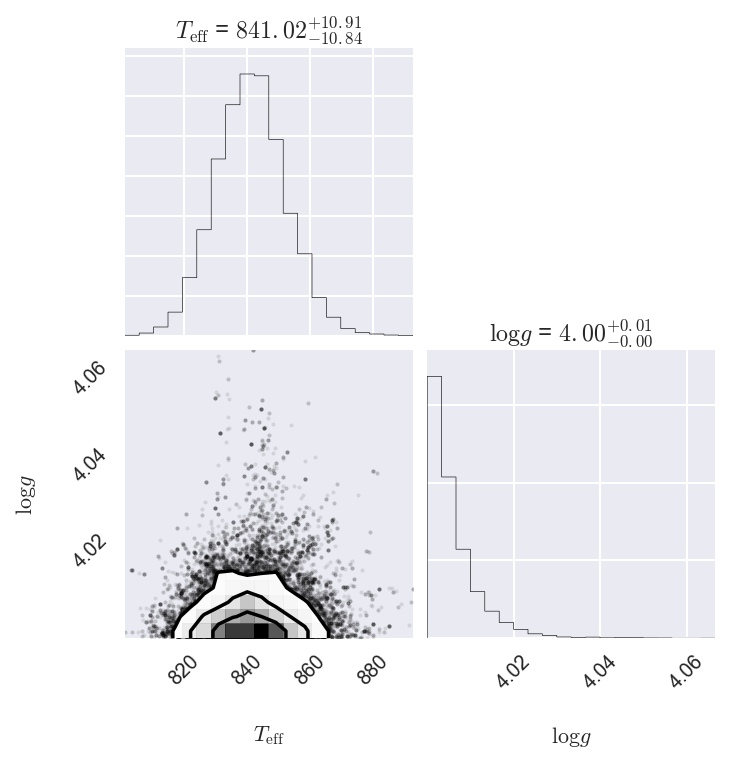

In [10]:
import corner
fig = corner.corner(fc[:, 0:2], labels=label[0:2], show_titles=True)
fig.savefig('../results/Gl570D_resg_run02_corner.png', dpi=300)

In [8]:
dat1 = pd.read_csv('../sf/Gl570D_resg/output/marley_grid/run02/spec_config.csv')
dat2 = pd.read_csv('../sf/Gl570D_resg/output/marley_grid/run02/models_draw.csv')

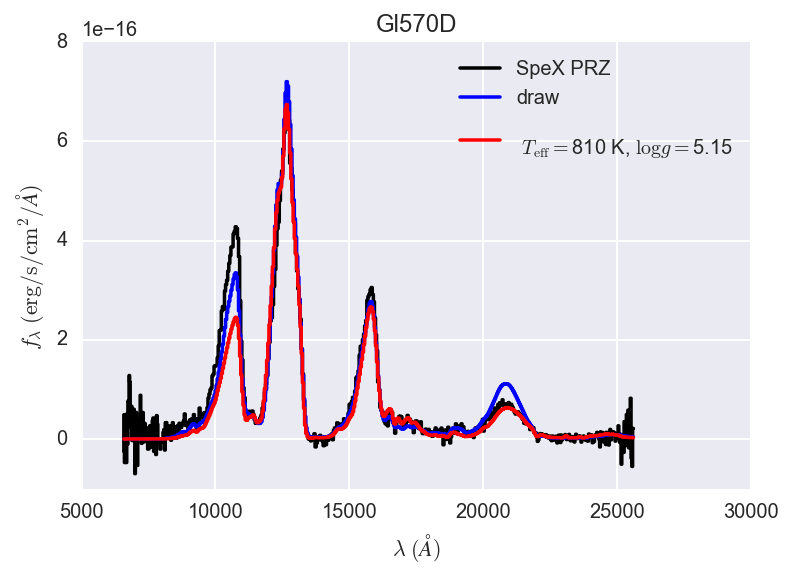

In [9]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('linear')

In [10]:
import astropy.units as u

In [11]:
x = dat1.wl.values*u.Angstrom
x_um = x.to(u.micron).value

In [12]:
c_fac = (u.erg/u.cm**2/u.s/u.Angstrom).to(u.mJy, equivalencies=u.spectral_density(x))

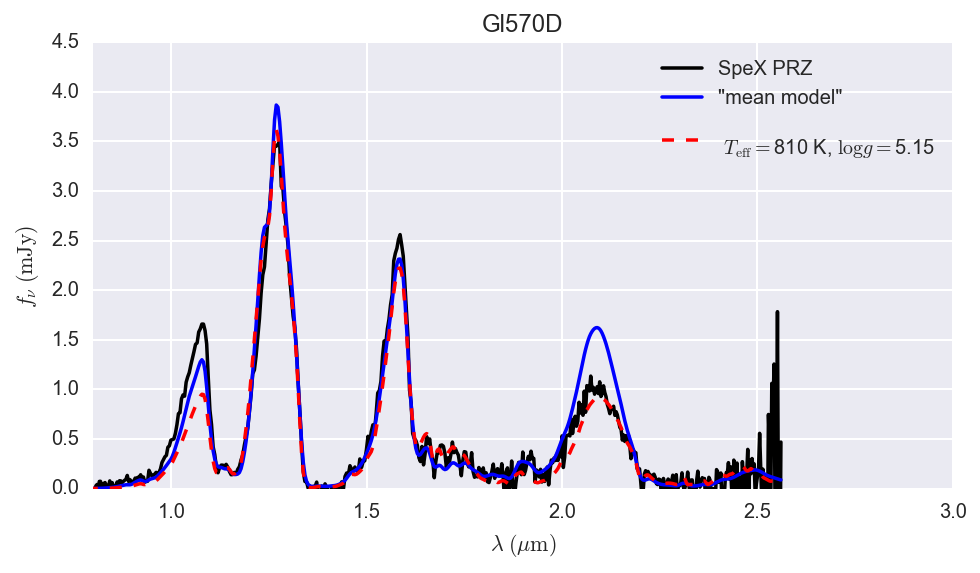

In [20]:
plt.figure(figsize=(7.7, 4))
plt.plot(x_um, dat1.data*c_fac, 'k-', label='SpeX PRZ')
plt.plot(x_um, dat2.model_comp50*c_fac, 'b-', label='"mean model"')

plt.plot(x_um, dat1.model_composite*c_fac, 'r--',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.ylabel(r'$f_{\nu} \;(\mathrm{mJy})$ ')
plt.ylim(0, 4.5)
plt.xlim(0.8, 3.0)
plt.title('Gl570D')
plt.legend(loc='best')
plt.xlabel('$\lambda \; (\mu \mathrm{m})$')
plt.savefig('../results/Gl570D_SpeX_Starfish_2017.png', dpi=300, bbox_inches='tight')

In [15]:
CC = np.load('../sf/Gl570D_full/output/marley_grid/run01/CC_new.npy')

In [16]:
from scipy.stats import multivariate_normal

In [17]:
nz_draw = multivariate_normal(dat2.model_comp50, CC)

In [18]:
nz_resid = multivariate_normal(dat2.model_comp50*0.0, CC)

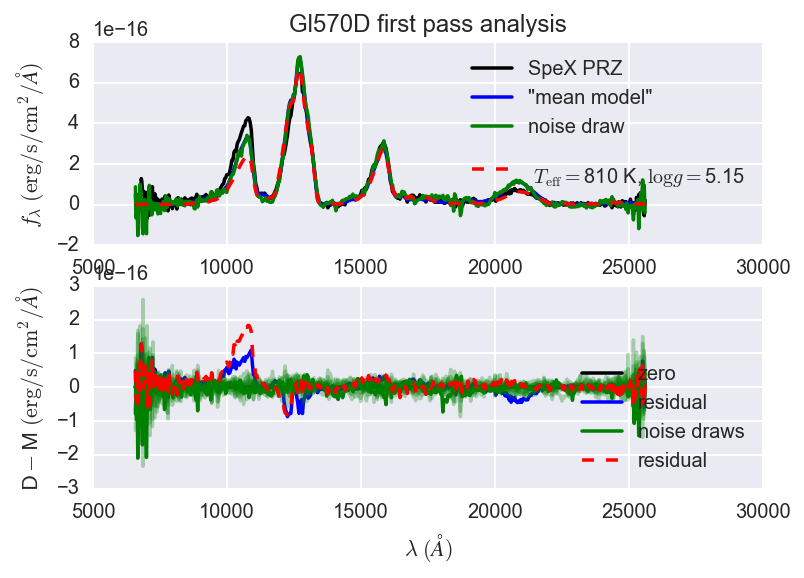

In [19]:
## plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(dat1.wl, dat1.data, 'k-', label='SpeX PRZ')
plt.plot(dat1.wl, dat2.model_comp50, 'b-', label='"mean model"')

plt.plot(dat1.wl, nz_draw.rvs(), 'g-', label='noise draw')
#for i in range(10):
#    plt.plot(dat1.wl, nz_draw.rvs(), 'g-', alpha=0.3)

plt.plot(dat1.wl, dat1.model_composite, 'r--',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D first pass analysis')
plt.legend(loc='best')
plt.yscale('linear')

plt.subplot(212)
plt.plot(dat1.wl, dat1.data*0.0, 'k-', label='zero')
plt.plot(dat1.wl, dat1.data-dat2.model_comp50, 'b-', label='residual')

plt.plot(dat1.wl, nz_resid.rvs(), 'g-', label='noise draws')
for i in range(10):
    plt.plot(dat1.wl, nz_resid.rvs(), 'g-', alpha=0.3)

plt.plot(dat1.wl, dat1.data-dat1.model_composite, 'r--',
         label='residual')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$\mathsf{D}-\mathsf{M} \;(\mathrm{erg/s/cm}^2/\AA)$ ')
#plt.title('Residual: (Data - Model)')
plt.legend(loc='best')
plt.yscale('linear')
#plt.savefig('../results/Gl570D_run02_mgs.pdf', bbox_inches='tight')
#plt.savefig('../results/Gl570D_run02_mgs.png', dpi=300)

The end.